
Nova Dwi Lestari



#Topic: Predicting Airline Passenger Satisfaction
Link Dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction



#NOMOR 1: Exploratory Data Analysis

##Read Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


##Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df = df.dropna(axis=0)

In [ ]:
del df['Unnamed: 0']

In [ ]:
df = df.rename(columns={'Leg room service':'Leg room'})

In [ ]:
from string import capwords
df.columns = [capwords(i) for i in df.columns]
df = df.rename(columns={'Departure/arrival Time Convenient':'Departure/Arrival Time Convenience'})

In [ ]:
# Check for NA or missing values
df.isna().sum()

Id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type Of Travel                        0
Class                                 0
Flight Distance                       0
Inflight Wifi Service                 0
Departure/Arrival Time Convenience    0
Ease Of Online Booking                0
Gate Location                         0
Food And Drink                        0
Online Boarding                       0
Seat Comfort                          0
Inflight Entertainment                0
On-board Service                      0
Leg Room                              0
Baggage Handling                      0
Checkin Service                       0
Inflight Service                      0
Cleanliness                           0
Departure Delay In Minutes            0
Arrival Delay In Minutes              0
Satisfaction                          0
dtype: int64

In [ ]:
df

,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)
df['Total Delay'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']

In [ ]:
df

,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction,Total Delay
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,43.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,7.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,20.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0,3.0
103590,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1,0.0
103591,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,21.0
103592,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0,0.0


##Descriptive Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,103594.0,64942.428625,37460.816597,1.0,32562.25,64890.0,97370.5,129880.0
Age,103594.0,39.380466,15.113125,7.0,27.00,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.00,842.0,1743.0,4983.0
Inflight Wifi Service,103594.0,2.729753,1.327866,0.0,2.00,3.0,4.0,5.0
Departure/Arrival Time Convenience,103594.0,3.060081,1.525233,0.0,2.00,3.0,4.0,5.0
Ease Of Online Booking,103594.0,2.756984,1.398934,0.0,2.00,3.0,4.0,5.0
Gate Location,103594.0,2.977026,1.277723,0.0,2.00,3.0,4.0,5.0
Food And Drink,103594.0,3.202126,1.329401,0.0,2.00,3.0,4.0,5.0
Online Boarding,103594.0,3.250497,1.349433,0.0,2.00,3.0,4.0,5.0
Seat Comfort,103594.0,3.439765,1.318896,0.0,2.00,4.0,5.0,5.0


Di sini kami dapat melihat beberapa informasi statistik dasar tentang penumpang kami dan detail penerbangannya:

Rata-rata usia penumpang adalah 39 tahun, dengan usia minimal 7 tahun dan maksimal 85 tahun.

Jarak tempuh rata-rata penerbangan adalah 1189 mil, dengan usia minimum 31 tahun dan maksimum 4893 mil.

Rata-rata suara pada bagian Satisfaction adalah 0,433. itu menyatakan bahwa mayoritasnya tidak puas dengan penerbangannya.

Rata-rata terjadinya Departure Delay adalah 14.7 menit, dengan maksimumnya yaitu 1592 menit atau sekitar 26.5 jam.

Rata-rata terjadinya Arrival Delay adalah 15.1 menit, dengan maksimumnya yaitu 1584 menit atau sekitar 26.4 jam.

Nilai rata-rata untuk kategori masukan pelanggan adalah 2 atau 3.

In [ ]:
df.astype(object).describe().T

,count,unique,top,freq
Id,103594,103594,70172,1
Gender,103594,2,Female,52576
Customer Type,103594,2,Loyal Customer,84662
Age,103594,75,39,2961
Type Of Travel,103594,2,Business travel,71465
Class,103594,3,Business,49533
Flight Distance,103594,3802,337,659
Inflight Wifi Service,103594,6,3,25789
Departure/Arrival Time Convenience,103594,6,4,25474
Ease Of Online Booking,103594,6,3,24370


Di sini kami dapat melihat beberapa informasi statistik lebih lanjut tentang penumpang kami dan detail penerbangannya:

Gender penumpang yang paling banyak terdaftar di dalam detail penerbangannya adalah Female (Perempuan) dengan frekuensi sebesar 52576 dari total count 103594. dapat disimpulkan bahwa sebesar 50.8% dari total count tersebut ber gender perempuan.

Tipe Customer yang paling banyak terdaftar di dalam detail penerbangannya adalah Loyal Customer dengan frekuensi sebesar 84662 dari total count 103594.

Usia (Age) yang paling banyak terdaftar yaitu berusia 39 tahun dengan frekuensi sebesar 2961 dari total count 103594.

Rata-rata usia (Age) penumpang adalah 39 tahun, dengan usia minimal 7 tahun dan maksimal 85 tahun.

Kelas (Class) yang paling banyak terdaftar yaitu kelas bisnis (Business Class) dengan frekuensi 49533 dari total count 103594.

Jarak tempuh (Flight Distance) yang paling banyak terdatar yaitu sekitar 337 mil dengan frekuensi 659 dari total count 103594.

Dari skala 0-5, sebanyak 25789 orang (dari total 103594) memberikan angka 3 mengenai Inflight Wifi Service. dapat disimpulkan bahwa koneksi internet yang ada didalam pesawat tidak jelek, tetapi tidak bagus juga.

Dari skala 0-5, sebanyak 25474 orang (dari total 103594) memberikan angka 4 mengenai Departure/Arrival Time Convenience. dapat disimpulkan bahwa jarang terjadinya delay/arrival.

Dari skala 0-5, sebanyak 24370 orang (dari total 103594) memberikan angka 3 mengenai Ease of Online Booking. dapat disimpulkan bahwa proses melakukan online booking masih belum terlalu praktis atau masih sulit dimengerti oleh banyak orang.

Dari skala 0-5, sebanyak 28489 orang (dari total 103594) memberikan angka 3 mengenai Gate Location yang ada dalam penerbangan. dapat disimpulkan bahwa jarak lokasi tiap gate tidak terlalu dekat dan tidak terlalu jauh.

Dari skala 0-5, sebanyak 24294 orang (dari total 103594) memberikan angka 4 mengenai Food and Drink yang ada dalam penerbangan. dapat disimpulkan bahwa orang-orang lumayan menikmati makanan yang disediakan dalam penerbangan.

Dari skala 0-5, sebanyak 30671 orang (dari total 103594) memberikan angka 4 mengenai Online Boarding yang ada dalam penerbangan. dapat disimpulkan bahwa proses untuk melakukan online boarding cukup praktis dan mudah dimengerti oleh para penumpang.

Dari skala 0-5, sebanyak 31692 orang (dari total 103594) memberikan angka 4 mengenai Seat Comfort yang ada dalam penerbangan. dapat disimpulkan bahwa kursi penumpang cukup nyaman untuk diduduki selama penerbangan.

Dari skala 0-5, sebanyak 29335 orang (dari total 103594) memberikan angka 4 mengenai Inflight Entertainment yang ada dalam penerbangan. dapat disimpulkan bahwa didalam penerbangan terdapat media entertainment yang cukup bagus sehingga membuat penumpang menikmatinya.

Dari skala 0-5, sebanyak 30773 orang (dari total 103594) memberikan angka 4 mengenai On-board Service yang ada dalam penerbangan. dapat disimpulkan bahwa on-board service yang disediakan cukup bagus.

Dari skala 0-5, sebanyak 28704 orang (dari total 103594) memberikan angka 4 mengenai Leg Room yang ada dalam penerbangan. dapat disimpulkan bahwa space jarak antar kursi lumayan jauh sehingga tidak terlalu sempit.

Dari skala 0-5, sebanyak 37274 orang (dari total 103594) memberikan angka 4 mengenai Baggagge Handling yang ada dalam penerbangan. dapat disimpulkan bahwa penanganan yang dilakukan porter dalam menangani barang-barang dibagasi lumayan bagus.

Dari skala 0-5, sebanyak 28975 orang (dari total 103594) memberikan angka 4 mengenai Check-in Service yang ada dalam penerbangan. dapat disimpulkan bahwa proses check-in cukup bagus & praktis.

Dari skala 0-5, sebanyak 37846 orang (dari total 103594) memberikan angka 4 mengenai Inflight Service yang ada dalam penerbangan. dapat disimpulkan bahwa service yang diberikan oleh pramugara/pramugari saat penerbangan cukup bagus.

Dari skala 0-5, sebanyak 27100 orang (dari total 103594) memberikan angka 4 mengenai Cleanliness yang ada dalam penerbangan. dapat disimpulkan bahwa kebersihan dalam pesawat cukup bagus hingga membuat penumpang nyaman.

Dari skala 0-5, sebanyak 58552 orang (dari total 103594) memberikan angka 0 mengenai Departure Delay yang ada dalam penerbangan. dapat disimpulkan bahwa para penumpang tidak puas dengan penerbangannya yang terkendala karena proses keberangkatan yang tertunda.

Dari skala 0-5, sebanyak 58159 orang (dari total 103594) memberikan angka 0 mengenai Arrival Delay yang ada dalam penerbangan. dapat disimpulkan bahwa para penumpang tidak puas dengan penerbangannya yang terkendala karena proses kedatangan yang tertunda.

Dari skala 0-5, sebanyak 58697 orang (dari total 103594) memberikan angka 0 mengenai Satisfaction yang ada dalam penerbangan. dapat disimpulkan bahwa para penumpang tidak puas dengan penerbangannya.

sebanyak 47459 orang (dari total 103594) mengalami delay.

##Exploratory Analysis and Visualization

In [ ]:
df['Satisfaction'].value_counts(normalize=True)

0    0.566606
1    0.433394
Name: Satisfaction, dtype: float64

Visualising the satisfation distribution among passengers

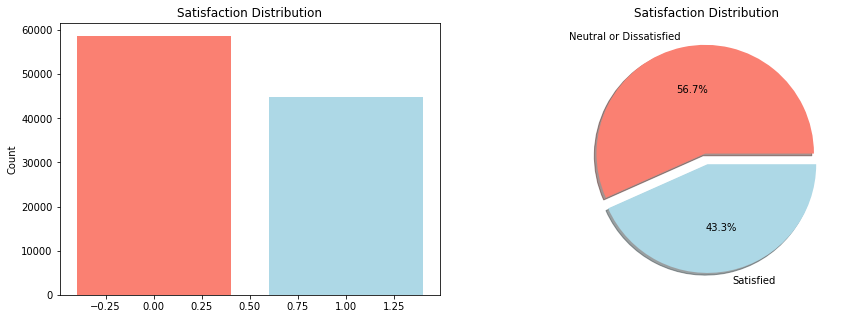

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(df["Satisfaction"].value_counts().index, df["Satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(df["Satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] ,
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

Di sini dapat dilihat beberapa informasi statistik lebih lanjut tentang kepuasan penumpang:

Sebanyak 56.7% penumpang menyatakan netral/ketidak puasannya terhadap penerbangan mereka. Lalu 43.3% nya menyatakan bahwa mereka puas dengan penerbangan mereka.

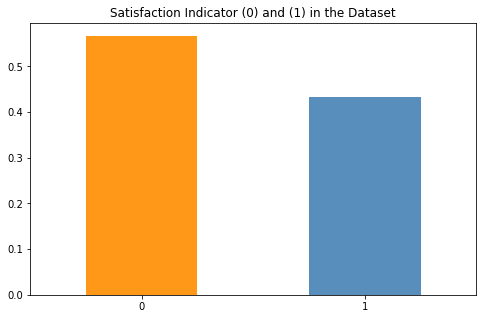

In [ ]:
fig = plt.figure(figsize = (8,5))
df.Satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

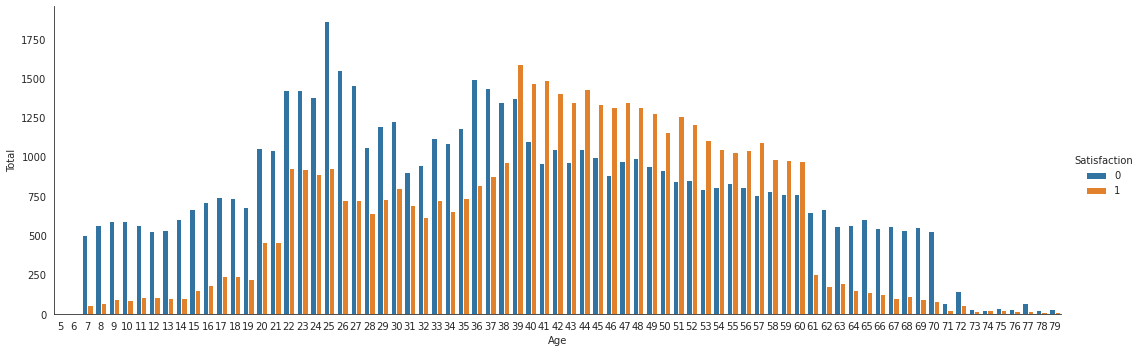

In [ ]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Total')


Dari usia 7 hingga 38 tahun dan dari usia 61 hingga 79 tahun, jumlah penumpang netral/tidak puas sangat tinggi dibandingkan dengan penumpang yang puas. Sedangkan pada kelompok usia 39-60 tahun, jumlah penumpang yang puas lebih tinggi dibandingkan dengan penumpang yang netral/tidak puas.

In [ ]:
px.histogram(df,
             x='Age',
             title='Age vs Satisfaction Ratio',
             marginal='box',
             color='Satisfaction')

Dapat dilihat pada grafik diatas bahwa dari kalangan umur 7 sampai 85 tahun bahwa grafik berwarna merah (dissatisfaction) selalu lebih unggul daripada warna biru (satisfaction). Itu menunjukkan bahwa mayoritas orang-orang lebih merasa tidak puas dengan penerbangannya dibanding dengan yang puas.

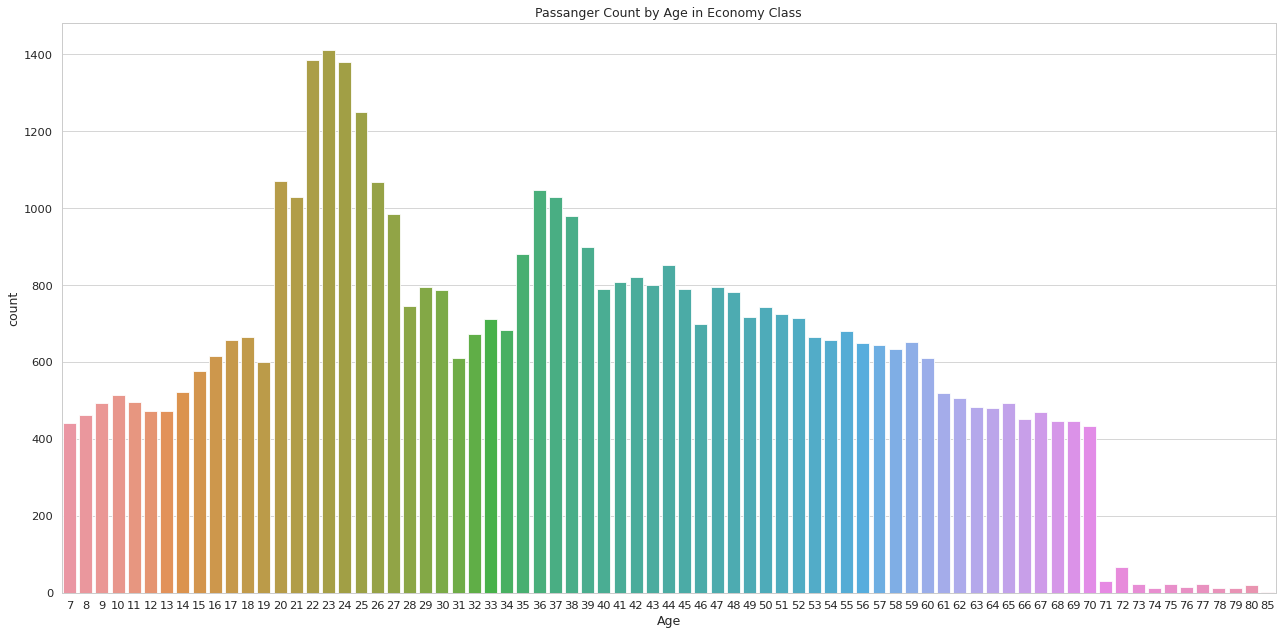

In [ ]:
# Grouping count passanger for each class
df_eco = df[df['Class']=='Eco']
df_eco1 = df[df['Class']=='Eco Plus']
df_bus = df[df['Class']=='Business']

# Show distribution graph each class by age (passenger)
## show the economy class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco,x='Age')
ax.set_title('Passanger Count by Age in Economy Class')
plt.tight_layout()
plt.show()


Dapat dilihat pada grafik diatas bahwa dari kalangan umur 20 sampai 26 tahun bahwa grafik mengalami lonjakan yang cukup tinggi jika dibanfingkan denga kalangan usia lain. Itu menunjukkan bahwa mayoritas orang-orang memilih yang economy class didominasi oleh kalangan dengan usia antara 20 sampai 26 tahun.

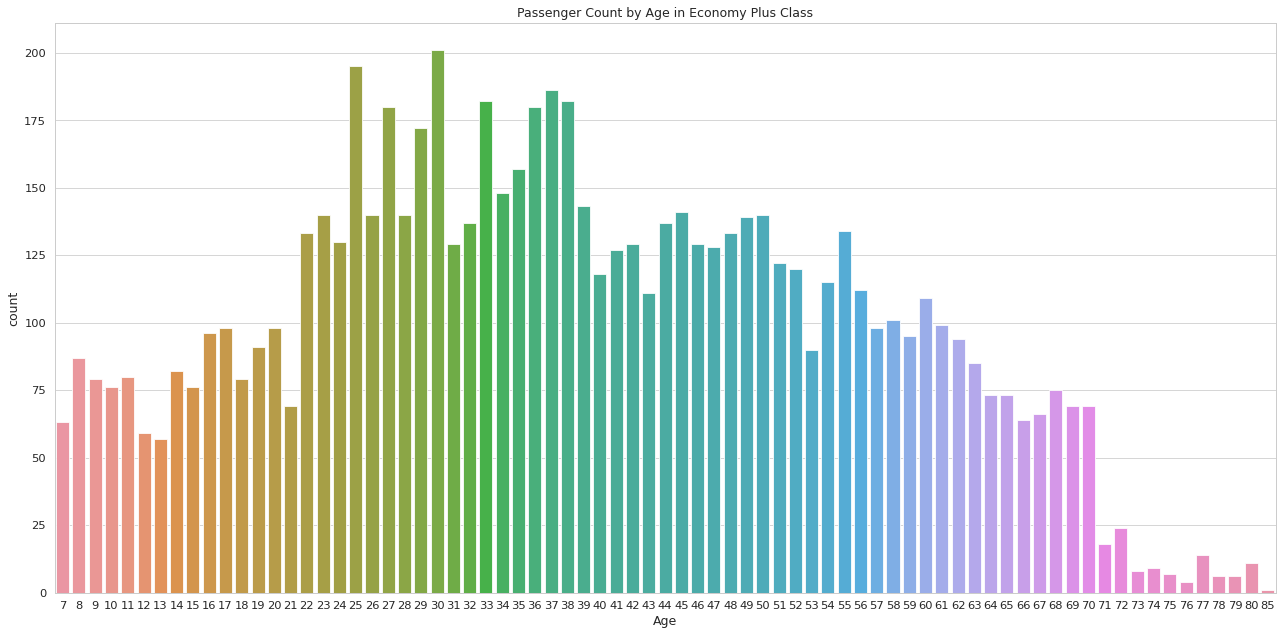

In [ ]:
## show the economy plus class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco1,x='Age')
ax.set_title('Passenger Count by Age in Economy Plus Class')
plt.tight_layout()
plt.show()

jumlah pelanggan berdasarkan usia di kelas ekonomi plus paling banyak pada usia 30 tahun

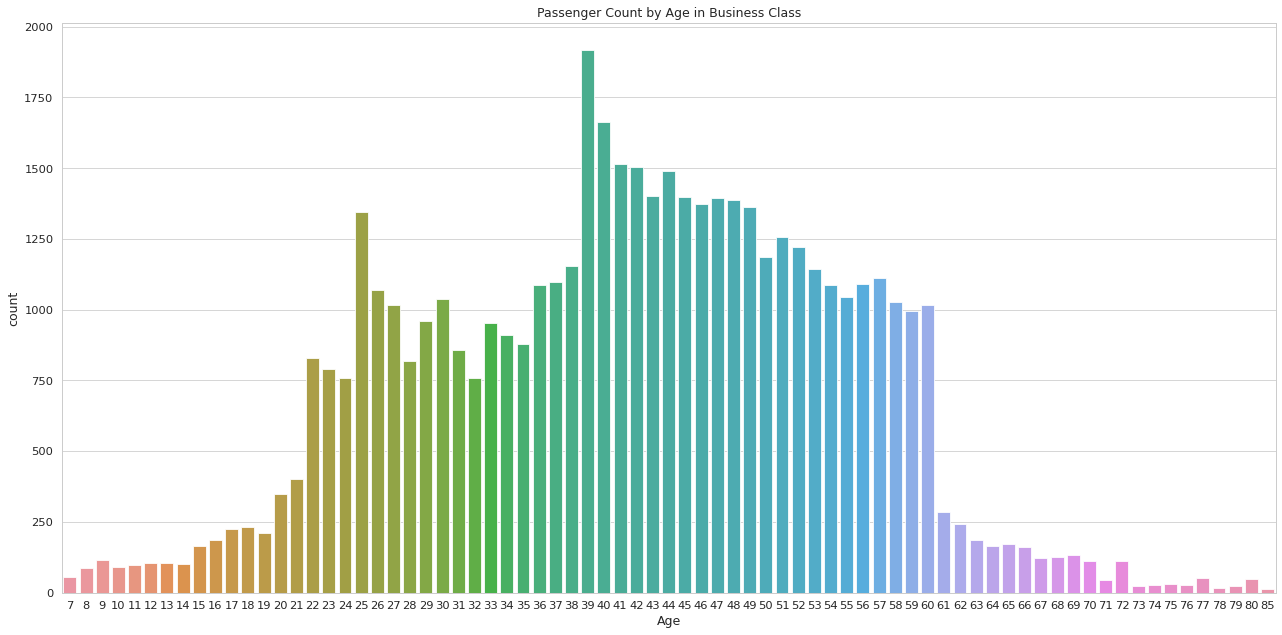

In [ ]:
## show the business class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_bus,x='Age')
ax.set_title('Passenger Count by Age in Business Class')
plt.tight_layout()
plt.show()

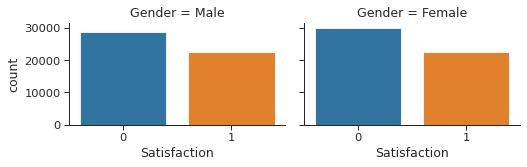

In [ ]:
# Gender type
with sns.axes_style(style='ticks'):
    g = sns.catplot("Satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)

Terlihat bahwa distribusi gender pelanggan netral/tidak puas dan puas adalah serupa. Untuk penumpang pria dan wanita, jumlah pelanggan netral/tidak puas lebih tinggi jika dibandingkan dengan jumlah pelanggan yang puas.

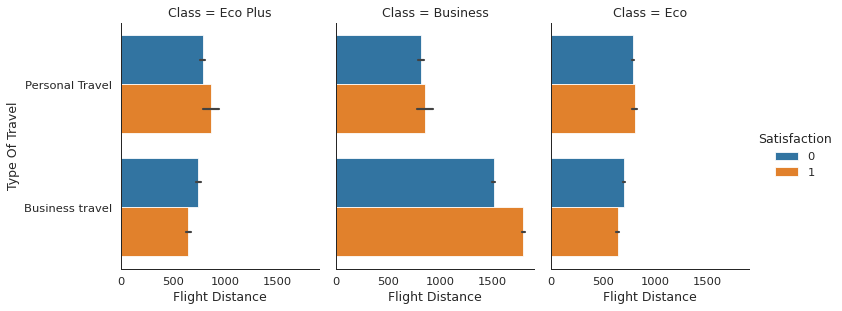

In [ ]:
# Type Of Travel and Flight Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type Of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

Untuk Business travel kategori Business Class, jumlah penumpang yang puas cukup tinggi untuk jarak penerbangan yang lebih jauh. Untuk kombinasi lainnya, terdapat distribusi penumpang yang puas dan netral/tidak puas yang hampir sama.

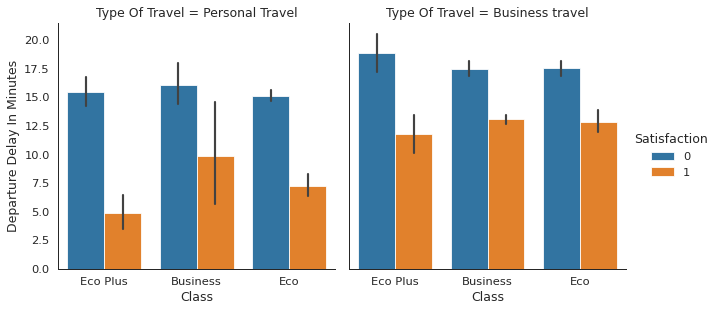

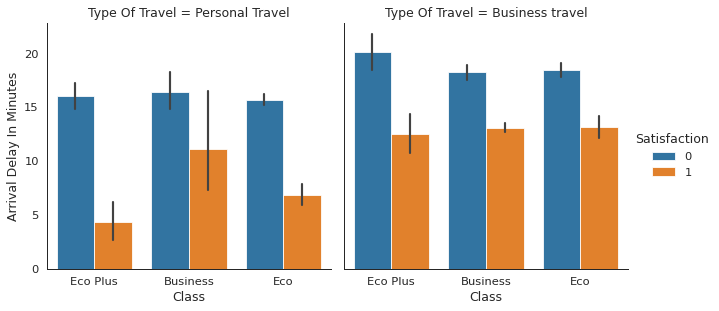

In [ ]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay In Minutes", hue="Satisfaction", col="Type Of Travel", data=df, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay In Minutes", hue="Satisfaction", col="Type Of Travel", data=df, kind="bar", height=4.5, aspect=1.0)

Untuk jenis Personal Travel (khusus untuk kelas Eco Plus dan Eco), jumlah penumpang netral/tidak puas sangat tinggi ketika keterlambatan kedatangan tinggi yang cukup jelas. Dengan perbandingan menit, semua kombinasi memiliki jumlah penumpang netral/tidak puas yang lebih tinggi dibandingkan dengan jumlah penumpang yang puas.

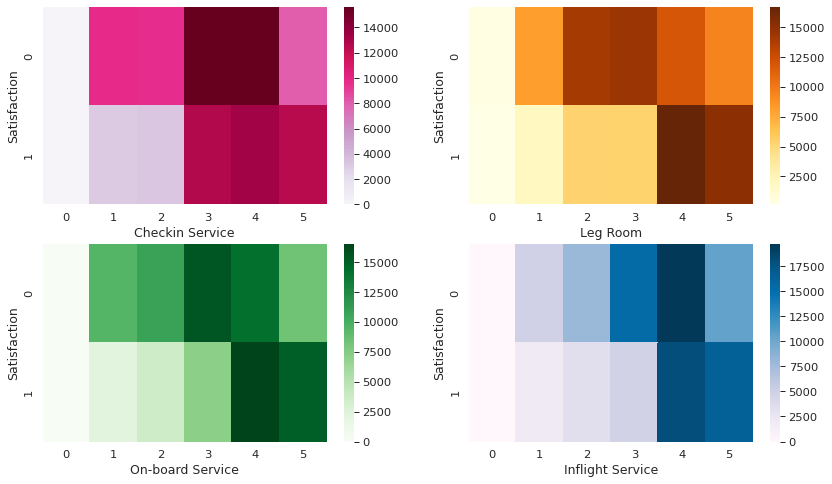

In [ ]:
# Checkin service, Leg room, On-board service and Inflight service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(df['Satisfaction'], df['Checkin Service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(df['Satisfaction'], df['Leg Room'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(df['Satisfaction'], df['On-board Service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(df['Satisfaction'], df['Inflight Service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

Untuk layanan checkin, penumpang yang memberikan rating 0-2 sebagian besar netral/tidak puas. Untuk ketiga layanan lain tersebut di atas, hanya pelanggan atau penumpang yang memberikan peringkat 4 dan 5 yang termasuk dalam kategori penumpang puas.

In [ ]:
# Sex ratio of Male and Female

df['Gender'].value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

In [ ]:
# Compare target column with sex column


pd.crosstab(df['Gender'], df['Satisfaction'])

Satisfaction,0,1
Gender,,
Female,30107,22469
Male,28590,22428


Note: 0 = neutral or dissatisfied and 1 = satisfied

Baik dari kalangan laki-laki maupun perempuan, keduanya mayoritas tidak puas dengan layanan penerbangannya.

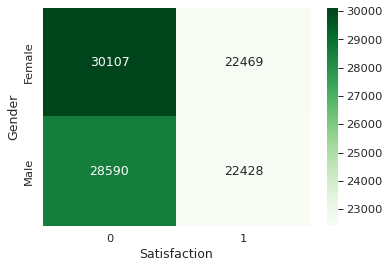

In [ ]:
# Visualize this crosstabulated data

sns.heatmap(pd.crosstab(df['Gender'], df['Satisfaction']),annot=True, cmap='Greens', cbar=True, fmt="d");

Visualisasi diatas menunjukan bahwa memang banyak yg tidak puas akan pelayanan dari airline itu sendiri, dan heatmap diatas menunjukan bahwa yang tidak puas banyaknya dari perempuan dengan jumlah total mencapai 30107

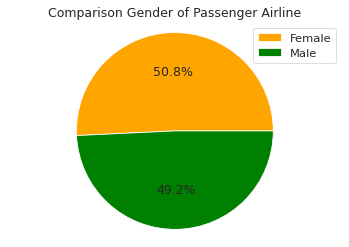

In [ ]:
#import library
from matplotlib import pyplot as plt

#Fungsi pie() dalam modul pyplot library matplotlib digunakan untuk memplot diagram pie.
#Legend adalah area yang menggambarkan elemen grafik.
#title --> untuk judul pada diagram pie
#.show untuk menampilkan

type_plot = plt
type_plot.pie(df['Gender'].value_counts(), autopct='%1.1f%%', colors=('orange', 'green'))
type_plot.legend(['Female', 'Male'])
type_plot.title('Comparison Gender of Passenger Airline')
plt.axis('equal')
type_plot.show()

- diagram pie diatas menunjukan bahwa penumpang airline terbanyak yaitu perempuan dengan perbandingan 50.8% dan laki-laki 49.2%.Hal ini dibuktikan dengan sex ratio pada bagian male and female yang ada value countsnya.

In [ ]:
# Customer Type Ratio

df['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

Menghitung jumlah customer berdsarkan Customer Type  :

 Loyal Customer       : 84662 orang

 Disloyal Customer    : 18932 orang

In [ ]:
# Crosstab Data

pd.crosstab(df['Customer Type'], df['Satisfaction'])

Satisfaction,0,1
Customer Type,,
Loyal Customer,44249,40413
disloyal Customer,14448,4484


Note: 0 = neutral or dissatisfied and 1 = satisfied

Baik dari kalangan Loyal Customer maupun disloyal Customer, keduanya mayoritas tersebut tidak merasa puas dengan layanan penerbangannya.

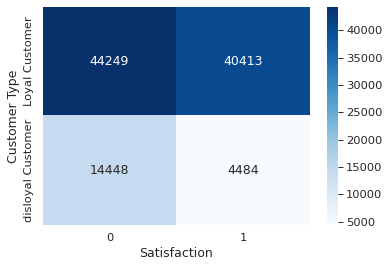

In [ ]:
 # Visualize this crosstabulated data

sns.heatmap(pd.crosstab(df['Customer Type'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

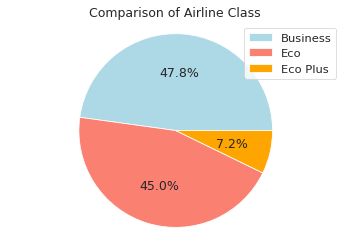

In [ ]:
type_plot = plt
type_plot.pie(df['Class'].value_counts(), autopct='%1.1f%%', colors=('lightblue', 'salmon','orange'))
type_plot.legend(['Business', 'Eco','Eco Plus'])
type_plot.title('Comparison of Airline Class')
plt.axis('equal')
type_plot.show()

Di sini kami dapat melihat beberapa informasi statistik lebih lanjut tentang perbandingan dari kelas yang pilih oleh penumpang kami :

dapat dilihat pada grafik diatas bahwa Business Class adalah yang paling banyak dipilih dengan jumlah 47.8%, lalu ada Eco Class yang tidak beda jauh dengan jumlah 45%.
yang terakhir ada Eco Pluss Class yang paling sedikit dipilih oleh penumpang dengan jumlah 7.2%

#NOMOR 2: SPARK

## Classification

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


mengimport beberapa library

In [ ]:
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import NaiveBayes


from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
spark = SparkSession.builder.appName("Classification with Spark").getOrCreate()
df_train = spark.read.csv("train.csv", inferSchema=True, header=True)
df_test = spark.read.csv("test.csv", inferSchema=True, header=True)
df = df_train.union(df_test)

menggabungkan semua data yang ada pada studi kasus ini dengan menggunakan union, disitu diberi nama df_test, yg dimana itu merupakan penggabungan dari data df_train dan df_test

In [ ]:
print('df_t: ', df_train.count(), 'df: ', df.count())

df_t:  103904 df:  129880


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

#penanganan missing values, karena ada data yg kosong, dimana semuanya yg kosong saya isikan dengan 0
for i in df.columns:
  df = df.fillna(0, subset=[i])

va = VectorAssembler(inputCols=['Flight Distance','Departure/Arrival time convenient','Ease of Online booking','Gate location',
                                'Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service',
                                'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes'], outputCol='features')
dfnew = va.transform(df)

#kolom satisfaction nantinya akan menjadi kolom label

dfnew = StringIndexer(inputCol='satisfaction', outputCol='label').fit(dfnew).transform(dfnew)

dfnew.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+--------------------+-----+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|            features|label|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+------------------

melakukan train test dengan perbandingan 70 30

In [ ]:
train, test = dfnew.randomSplit([0.7,0.3],seed = 777)
train.show()
test.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+--------------------+-----+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|            features|label|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+------------------

In [ ]:
lr = LogisticRegression(featuresCol='features',labelCol='label')
model_lr = lr.fit(train)
model_pred = model_lr.transform(test)
model_pred.select("features","label","rawPrediction","probability","prediction").show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1142.0,2.0,2.0,2...|  1.0|[-2.1159784076610...|[0.10755347715836...|       1.0|
|[1180.0,4.0,2.0,1...|  0.0|[2.71609724836145...|[0.93796984999393...|       0.0|
|[2486.0,4.0,4.0,4...|  1.0|[-2.6003437648447...|[0.06911629949927...|       1.0|
|[1174.0,4.0,2.0,4...|  0.0|[2.30977846653423...|[0.90968365591397...|       0.0|
|[2139.0,5.0,4.0,5...|  0.0|[0.05643398708617...|[0.51410475357462...|       0.0|
|[3347.0,1.0,1.0,1...|  0.0|[0.97775898506689...|[0.72666332375095...|       0.0|
|[819.0,4.0,4.0,4....|  1.0|[-1.6554190290010...|[0.16037789666938...|       1.0|
|[2611.0,5.0,4.0,4...|  1.0|[-0.4678987684660...|[0.38511369735642...|       1.0|
|[1192.0,5.0,4.0,1...|  0.0|[-1.2349203299712...|[0.22532141331763...|       1.0|
|[1734.0,4.0,4.0

label = satisfaction
- Logistic regression memperkirakan kemungkinan suatu peristiwa terjadi, seperti memilih atau tidak memilih, berdasarkan kumpulan data variabel independen yang diberikan. Karena hasilnya adalah probabilitas, variabel dependen dibatasi antara 0 dan 1

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
ev = MulticlassClassificationEvaluator()
ev.setPredictionCol('prediction')
ev.setLabelCol('label')
ev.evaluate(model_pred)

0.8200730771683599

##Clustering

##Read Data

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, MinMaxScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
data = spark.read.csv('train.csv', inferSchema=True, header=True)
data.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+-

In [ ]:
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()
data=spark.read.csv('train.csv', header=True, inferSchema=True)
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

In [ ]:
data=data.na.drop()

In [ ]:
from pyspark.ml.feature import VectorAssembler
data.columns
assemble=VectorAssembler(inputCols=['_c0',
 'id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes'], outputCol='features')
assembled_data=assemble.transform(data)

Semua atribut yang dipertimbangkan adalah numerik atau numerik diskrit, oleh karena itu kita perlu mengubahnya menjadi fitur menggunakan Vector Assenmbler.
VA adalah transformator yang mengubah sekumpulan fitur menjadi kolom vektor tunggal yang sering disebut sebagai array fitur. Fitur disini adalah kolom.

In [ ]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show()


+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+--------------------+--------------------+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|            features|        standardized|
+---+------+------+-----------------+---+---------------+--------+---------------+----------

Sekarang semua kolom ditransformasikan menjadi satu vektor fitur, kita perlu standardize data untuk membawanya ke skala yang sebanding. Misalnya balance dapat memiliki skala dari 10-1000 sedangkan frekuensi balance memiliki skala dari 0-1 katakanlah. Jarak Euclidean selalu lebih dipengaruhi oleh variabel pada skala yang lebih tinggi, oleh karena itu penting untuk menskalakan variabel tersebut.

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
  KMeans_algo=KMeans (featuresCol='standardized', k=i)
  KMeans_fit=KMeans_algo.fit(data_scale_output)
  output=KMeans_fit.transform(data_scale_output)
  score=evaluator.evaluate(output)
  silhouette_score.append(score)
  print("Silhouette Score:",score)

Silhouette Score: 0.2436559423008637
Silhouette Score: 0.18543168989525582
Silhouette Score: 0.18472733722150672
Silhouette Score: 0.19647262493953438
Silhouette Score: 0.1973138917773814
Silhouette Score: 0.1803542030560755
Silhouette Score: 0.17132952978176
Silhouette Score: 0.17004946872204954


Memvisualisasikan skor siluet. Skor Silhouette menggunakan ClusteringEvaluator() mengukur seberapa dekat setiap titik dalam satu klaster dengan titik-titik di klaster tetangga sehingga membantu dalam menentukan klaster yang compact dan ditempatkan dengan baik.

Text(0, 0.5, 'count')

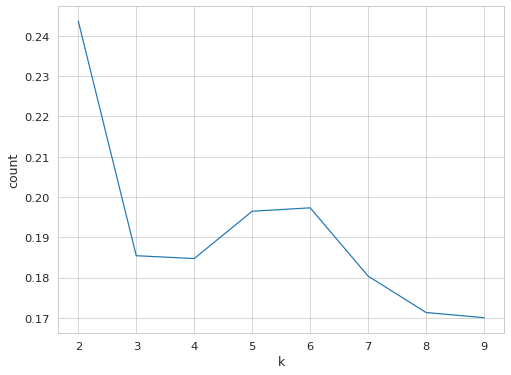

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('count')

Saya lebih suka memilih dengan K=6 dimana maksima lokal dari Skor Silhouette diamati.

In [ ]:
!jupyter nbconvert --to html /content/uas_bddm.ipynb

[NbConvertApp] Converting notebook /content/uas_bddm.ipynb to html
[NbConvertApp] Writing 1510136 bytes to /content/uas_bddm.html
